# Predictive Modeling and Risk Scoring for Bank Customer Churn

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


# Importing Files

In [2]:
df = pd.read_csv("d:\MyFiles\Downloads\European_Bank - European_Bank.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15864\463112221.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("d:\MyFiles\Downloads\European_Bank - European_Bank.csv")


,Year,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2025,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2025,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2025,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,2025,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,2025,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,2025,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,2025,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,2025,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [26]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [3]:
df.isnull().sum()

Year               0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Understanding Data

In [27]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  BalanceSalaryRatio  10000 non-null  float64
 13  ProductDensity      10000 non-null  float64
 14  EngagementProduct   10000 non-null  int64  
 15  AgeTenure           10000 non-null  int64  
dtypes: fl

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2025.000000,0.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
CreditScore,10000.0,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.0,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.0,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.0,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.0,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.0,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.0,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.0,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
Exited,10000.0,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


# Feature Engineering

In [5]:
df.drop(columns=["CustomerId", "Surname"], inplace=True)


In [6]:
df["BalanceSalaryRatio"] = df["Balance"] / (df["EstimatedSalary"] + 1)

In [7]:
df["ProductDensity"] = df["NumOfProducts"] / (df["Tenure"] + 1)

In [8]:
df["EngagementProduct"] = df["IsActiveMember"] * df["NumOfProducts"]

In [9]:
df["AgeTenure"] = df["Age"] * df["Tenure"]

In [10]:
df[["AgeTenure", "EngagementProduct", "ProductDensity", "BalanceSalaryRatio"]].round(2)

,AgeTenure,EngagementProduct,ProductDensity,BalanceSalaryRatio
0,84,1,0.33,0.00
1,41,1,0.50,0.74
2,336,0,0.33,1.40
3,39,0,1.00,0.00
4,86,1,0.33,1.59
...,...,...,...,...
9995,195,0,0.33,0.00
9996,350,1,0.09,0.56
9997,252,1,0.12,0.00
9998,126,0,0.50,0.81


# Feature Selection

In [11]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [12]:
cat_cols = ["Geography", "Gender"]
num_cols = X.columns.drop(cat_cols)

# Encoding (Onehotendoder)

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

# Train & Split Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

# Scaling

# Logistic Regression

In [15]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_p, y_train)

y_pred = log_model.predict(X_test_p)
y_prob = log_model.predict_proba(X_test_p)[:, 1]

# Decision Tree

In [16]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_p, y_train)

dt_pred = dt_model.predict(X_test_p)
dt_prob = dt_model.predict_proba(X_test_p)[:, 1]

# Random Forest (Classifier)

In [17]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_p, y_train)

rf_pred = rf_model.predict(X_test_p)
rf_prob = rf_model.predict_proba(X_test_p)[:, 1]

# Gradient Boosting (Classifier)

In [18]:
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,random_state=42)
gb_model.fit(X_train_p, y_train)

gb_pred = gb_model.predict(X_test_p)
gb_prob = gb_model.predict_proba(X_test_p)[:, 1]

# XG Boosting (Classifier)

In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train_p, y_train)

xgb_pred = xgb_model.predict(X_test_p)
xgb_prob = xgb_model.predict_proba(X_test_p)[:, 1]


In [20]:
def evaluate(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_prob)
    }


In [21]:
results = pd.DataFrame([
    evaluate(y_test, y_pred, y_prob),
    evaluate(y_test, dt_pred, dt_prob),
    evaluate(y_test, rf_pred, rf_prob),
    evaluate(y_test, gb_pred, gb_prob),
    evaluate(y_test, xgb_pred, xgb_prob)

],
index=["Logistic", "DecisionTree", "RandomForest", "GradientBoost", "XGBoost"])


In [22]:
results

,Accuracy,Precision,Recall,F1,ROC_AUC
Logistic,0.8108,0.605882,0.202358,0.303387,0.783311
DecisionTree,0.8616,0.805243,0.422397,0.554124,0.850881
RandomForest,0.8676,0.774691,0.493124,0.602641,0.863668
GradientBoost,0.8692,0.777439,0.500982,0.609319,0.871566
XGBoost,0.8704,0.784615,0.500982,0.611511,0.876501


# ROC AUC SCORE FOR ALL MODELS COMPARISION

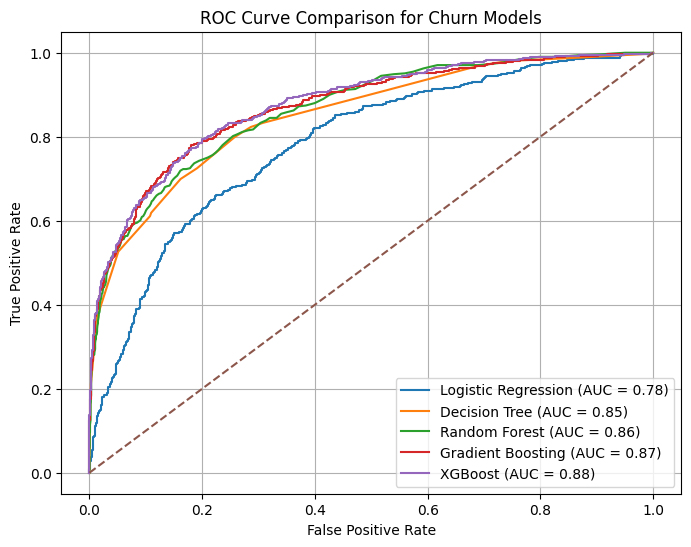

In [23]:
from sklearn.metrics import roc_curve, auc

model_probs = {
    "Logistic Regression": y_prob,
    "Decision Tree": dt_prob,
    "Random Forest": rf_prob,
    "Gradient Boosting": gb_prob,
    "XGBoost": xgb_prob
}

plt.figure(figsize=(8, 6))

for model_name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Churn Models")
plt.legend()
plt.grid()
plt.show()



# ROC CURVE WITH BINARY LABEL FOR EACH MODELS

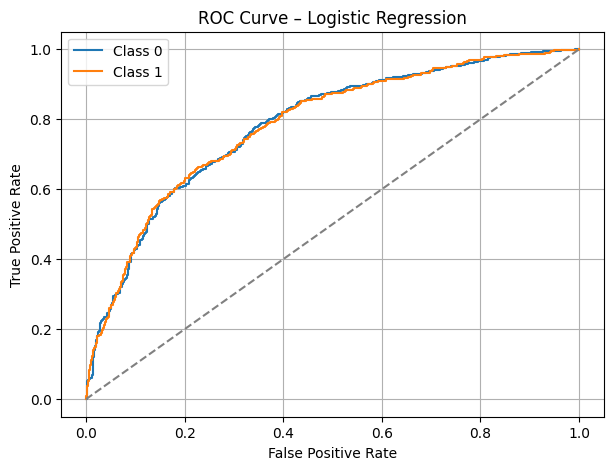

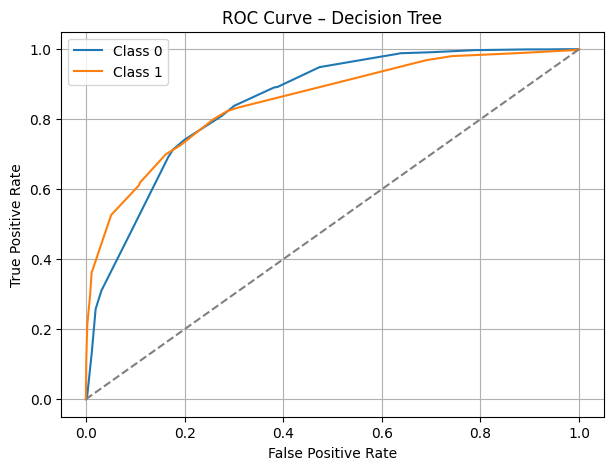

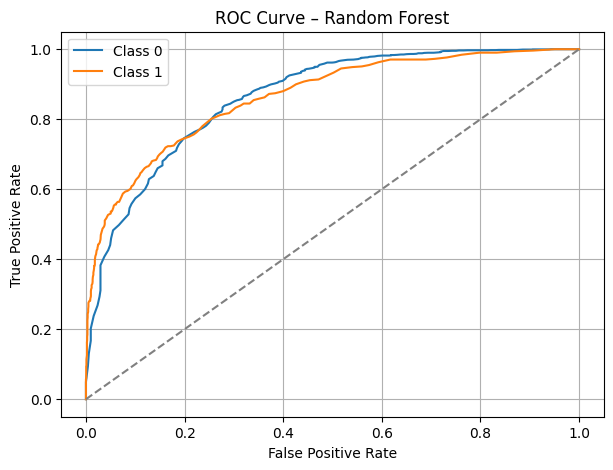

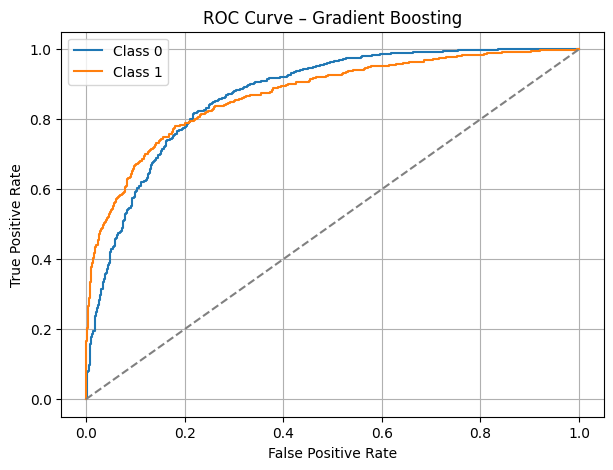

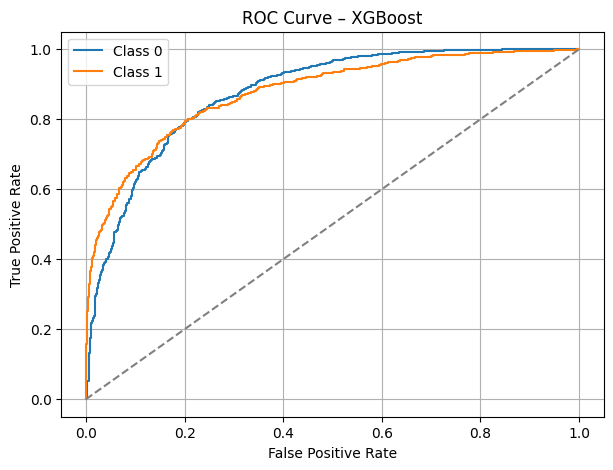

In [24]:
model_probs = {
    "Logistic Regression": log_model.predict_proba(X_test_p),
    "Decision Tree": dt_model.predict_proba(X_test_p),
    "Random Forest": rf_model.predict_proba(X_test_p),
    "Gradient Boosting": gb_model.predict_proba(X_test_p),
    "XGBoost": xgb_model.predict_proba(X_test_p)
}

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

for model_name, y_prob in model_probs.items():
    
    plt.figure(figsize=(7, 5))
    
    for i, cls in enumerate(np.unique(y_test)):
        fpr, tpr, _ = roc_curve(y_test == cls, y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {cls}")
    
    # Random baseline
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {model_name}")
    plt.legend()
    plt.grid()
    plt.show()


# ✅ What Each Chart Shows (Plain English)

## For each model:

Class 0 curve → how well the model predicts retained customers

Class 1 curve → how well the model predicts churned customers

# 1️⃣ Which Model Is the BEST?

## 🔹 XGBoost

Curves almost overlap Gradient Boosting

Slightly better or equal for Class 1

Very strong discrimination

📌 Conclusion: Top-performing model

## 🔹 Gradient Boosting

Curves are consistently higher

Very good separation for churned customers (Class 1)

Stable and smooth

📌 Conclusion: Excellent performance

# ✅ FINAL MODEL SELECTION (From ROC Proof)

## Gradient Boosting and XGBoost are the best models

Why?

Best separation of churned vs retained customers

Strong performance for both labels (0 and 1)

Consistent curves far from random guessing

📌 Preferred final model:
Gradient Boosting (best balance of performance + stability + simplicity)

# Main reasons customers leave:

- Low engagement

- Inactive members churn more

- Fewer bank products

- Weak relationship with the bank

- Short tenure

- New customers are more vulnerable

- Age + tenure imbalance

- Older customers with weak engagement leave faster

In [25]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64